# Instructor Do: Rolling Statistics

This program reads in Tesla (TSLA) data as a CSV and plots the rolling 7-, 30-, and 180-day mean and standard deviation of the daily closing price over the last 10 years.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path

%matplotlib inline

### Read CSV in as DataFrame

In [2]:
# Read the TSLA data, set the `date` as the index
tsla_data = Path("../Resources/tsla_historical.csv")
tsla_df = pd.read_csv(tsla_data, index_col="date", infer_datetime_format=True, parse_dates=True)

# Sorting the date index in ascending order
tsla_df = tsla_df.sort_index()

# Display sample data
tsla_df.head()

,close
date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.20
2010-07-06,16.11


### Plot Daily Closing Price of Tesla

<AxesSubplot:xlabel='date'>

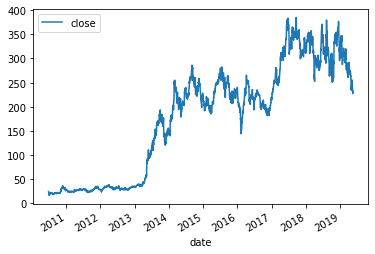

In [3]:
# Plot the daily closing prices of Tesla
tsla_df.plot()

### Rolling 7-Day Mean & Standard Deviation of TSLA Closing Prices

In [4]:
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [5]:
#below examples will show rolling mean calculations with window sizes of two
#You want a rolling average of 2 days, so the first (2-1=1) day will have no data.


s.rolling(2).mean().round(2)

0    NaN
1    1.5
2    2.5
3    3.5
dtype: float64

In [6]:
#below examples will show rolling mean calculations with window sizes of 3
#You want a rolling average of 3 days, so the first (3-1=2) days will have no data.
s.rolling(3).mean()

0    NaN
1    NaN
2    2.0
3    3.0
dtype: float64

In [7]:
#you can fill 1st few NaN rows with the original df
s.rolling(center=False, window=3).mean().fillna(s)

0    1.0
1    2.0
2    2.0
3    3.0
dtype: float64

In [8]:
"""
There is also an argument, min_periods that you can use. 
If you pass min_periods=1 then it will take the first value as it is, 
second value as the mean of the first two etc. 
It might make more sense in some cases
"""
s.rolling(center=False, window=5, min_periods=1).mean()

0    1.0
1    1.5
2    2.0
3    2.5
dtype: float64

In [9]:
tsla_df.rolling(window=7).mean().head(8)

,close
date,
2010-06-29,NaN
2010-06-30,NaN
2010-07-01,NaN
2010-07-02,NaN
2010-07-06,NaN
2010-07-07,NaN
2010-07-08,19.750000
2010-07-09,18.822857


In [10]:
tsla_df.head(8)

,close
date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.20
2010-07-06,16.11
2010-07-07,15.80
2010-07-08,17.46
2010-07-09,17.40


In [11]:
#Use the "30D" offset for 30 days or approximately one month.

tsla_df.rolling(window="30D").mean().head(8)

,close
date,
2010-06-29,23.890000
2010-06-30,23.860000
2010-07-01,23.226667
2010-07-02,22.220000
2010-07-06,20.998000
2010-07-07,20.131667
2010-07-08,19.750000
2010-07-09,19.456250


<AxesSubplot:xlabel='date'>

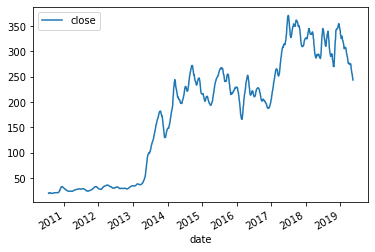

In [48]:
# Plot a rolling 7-day mean of TSLA's closing prices
#tsla_df.rolling(window=17).mean().plot() # plot becomes even smoother
tsla_df.rolling(window=7).mean().plot()

<AxesSubplot:xlabel='date'>

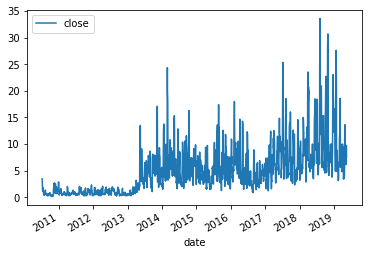

In [13]:
# Plot a rolling 7-day std dev of TSLA's closing prices
tsla_df.rolling(window=7).std().plot()

### Rolling 30-Day Mean and Standard Deviation of TSLA Closing Prices

<AxesSubplot:xlabel='date'>

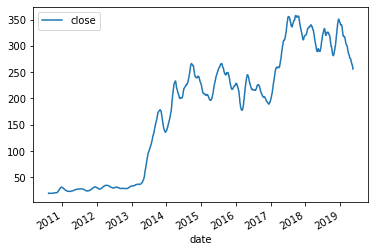

In [14]:
# Plot a rolling 30-day mean of TSLA's closing prices
tsla_df.rolling(window=30).mean().plot()

<AxesSubplot:xlabel='date'>

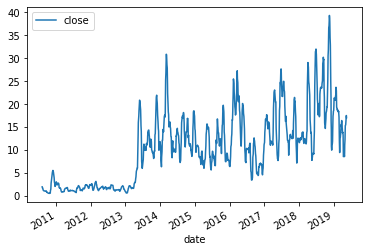

In [15]:
# Plot a rolling 30-day std dev of TSLA's closing prices
tsla_df.rolling(window=30).std().plot()

### Rolling 180-Day Mean and Standard Deviation of TSLA Closing Prices

<AxesSubplot:xlabel='date'>

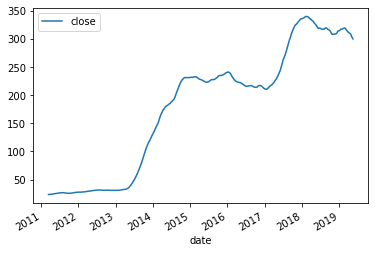

In [16]:
# Plot a rolling 180-day mean of TSLA's closing prices
tsla_df.rolling(window=180).mean().plot()

<AxesSubplot:xlabel='date'>

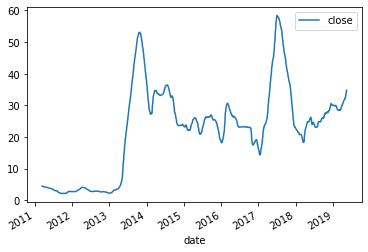

In [17]:
# Plot a rolling 180-day std dev of TSLA's closing prices
tsla_df.rolling(window=180).std().plot()

### Overlay Daily Closing Price and 180-Day Rolling Mean of TSLA

In [32]:
rolling = tsla_df.rolling(window=180).mean()
rolling

,close
date,
2010-06-29,NaN
2010-06-30,NaN
2010-07-01,NaN
2010-07-02,NaN
2010-07-06,NaN
...,...
2019-05-09,301.987694
2019-05-10,301.530028
2019-05-13,301.004306


In [35]:
rolling=rolling.fillna(0)
rolling

,close
date,
2010-06-29,0.000000
2010-06-30,0.000000
2010-07-01,0.000000
2010-07-02,0.000000
2010-07-06,0.000000
...,...
2019-05-09,301.987694
2019-05-10,301.530028
2019-05-13,301.004306


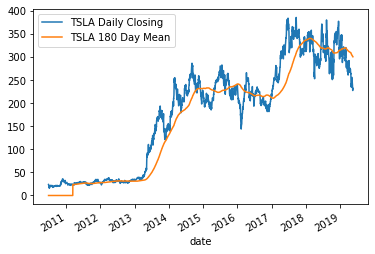

In [47]:
# Set figure of the daily closing prices of Tesla
plot_orig = tsla_df.plot()

# Plot 180-Day Rolling Mean on the same figure
#tsla_df.rolling(window=180).mean().plot(ax=axes)
rolling.plot(ax=plot_orig)

# Set the legend of the figure
plot_orig.legend(["TSLA Daily Closing", "TSLA 180 Day Mean"]);